## *Prologue*

* **Python for Portfolio Optimization: The Ascent! **

*First working lessons to ascend the hilly terrain of Portfolio Optimization in seven strides (Lessons), beginning with the fundamentals (Lesson 1) and climbing slope after slope (Lessons 2-6), to reach the first peak of constrained portfolio optimization models (Lesson 7), amongst a range of peaks waiting beyond! * 
  
* **Lesson 1 Fundamentals of Risk and Return of a Portfolio **


##  Lesson 2
 

# Some Glimpses of Financial Data Wrangling 

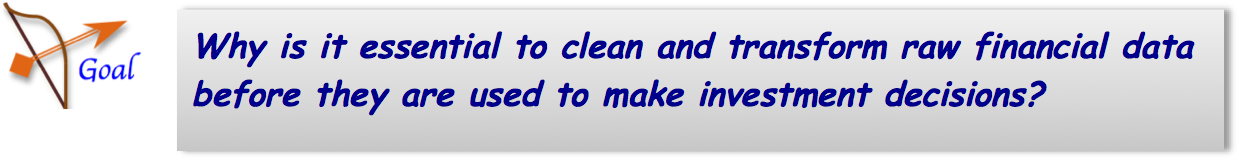

In [1]:
from IPython.display import Image
Image("/kaggle/input/some-glimpses-of-financial-data-wrangling/Lesson2GoalHeaderImage.png")


##   2.1   Introduction

The "raw" financial datasets based on which crucial investment decisions are taken, cannot be used on an as-is-where-is basis, despite the fact that these are dynamically generated on-line as the trading proceeds at the stock exchanges concerned. The financial datasets need to be cleaned and transformed to enable smooth functioning of the models that work over these datasets.

**Data wrangling** or **Data munging** or the more familiar **Data pre-processing**, deals with a slew of techniques that serve to clean the data, transform the data  and render it fit for use by various models that will work over it, to undertake operations or analysis or research. 

With regard to "raw" financial datasets, the following problems may be encountered:  

(1) blank tuples (rows) in the dataset, and   
(2) missing values of certain fields in the dataset  

Fig. 2.1 illustrates a snapshot of a financial dataset extracted from S&P BSE200 (Bombay Stock Exchange, India) for the period Feb 17, 2002 to Feb 28, 2002, that has these aformentioned problems. The empty rows, columns and missing values,  can be seen in the "raw" dataset.

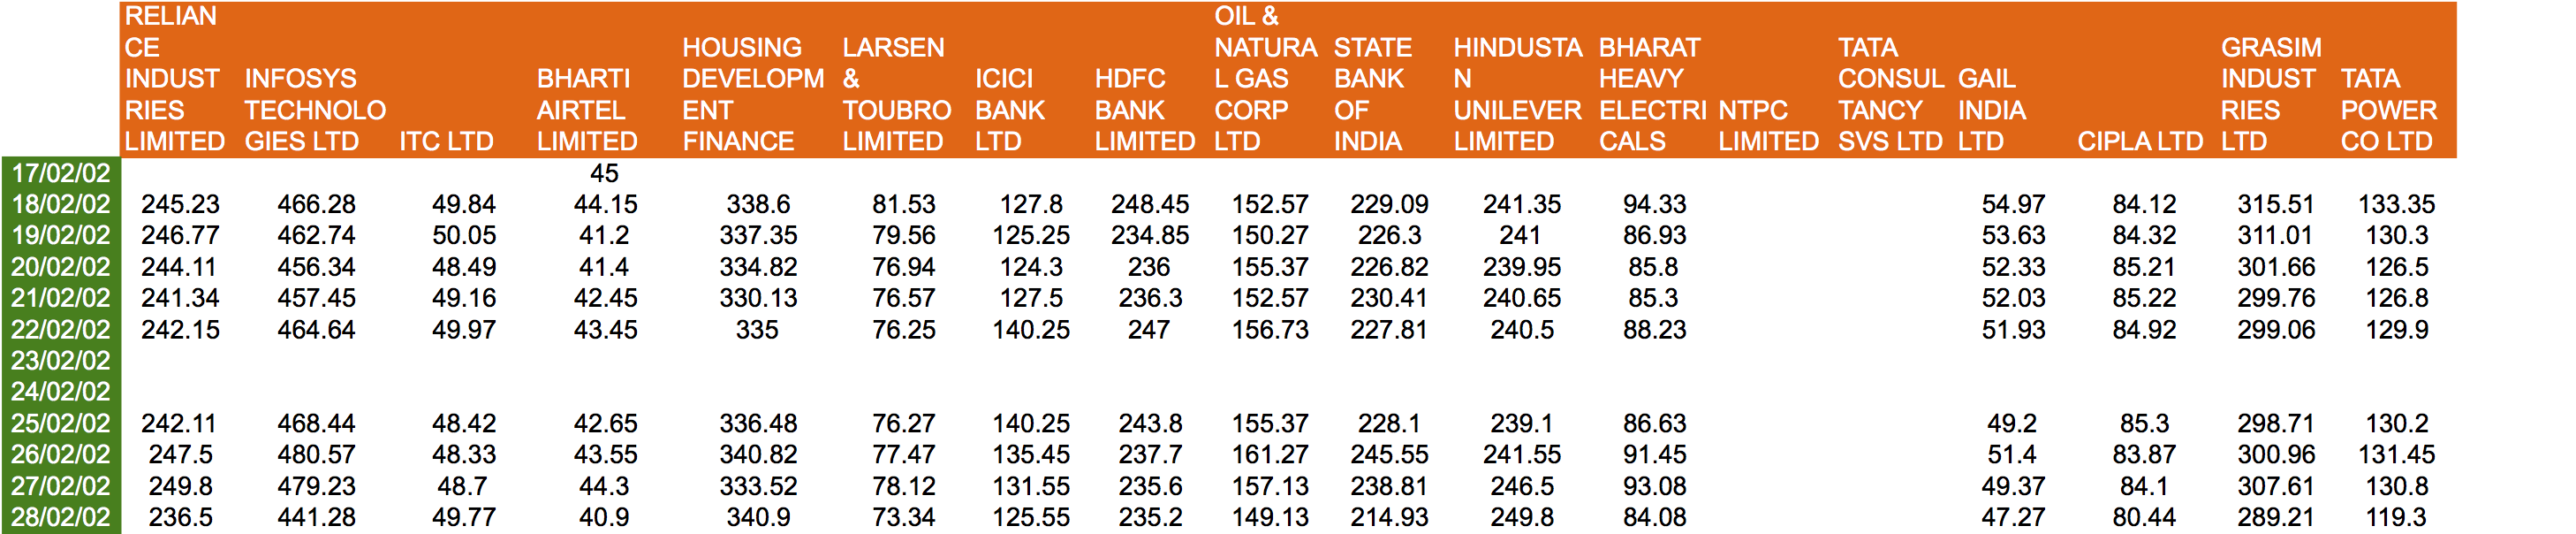

In [2]:
from IPython.display import Image
Image("/kaggle/input/some-glimpses-of-financial-data-wrangling/Lesson2Fig2_1.png")

#### Fig. 2.1 Snapshot of a finance dataset that calls for data wrangling

## 2.2      Eliminating empty rows

Considering the size of the finance datasets,  which needless to say can be very huge, the removal of empty rows from the dataset can be accomplished by coding a function for the same. The Python function **EmptyRowsElimination**,  reads the stock prices from the dataset to eliminate the empty rows in the dataset using **dropna** method of Pandas. 

In [3]:
#function to eliminate empty rows in a dataset
def EmptyRowsElimination(dfAssetPrices):

    # read dataset and extract its dimensions
    [Rows, Columns] = dfAssetPrices.shape
    dFrame = dfAssetPrices.iloc[0:Rows, 0:Columns]
    
    # call dropna method from Pandas 
    dFClean = dFrame.dropna(axis =0, how ='all')
    return dFClean

The Python code invoking the function **EmptyRowsElimination** over the example dataset shown in Fig. 2.1 is given below. The output shows that the  two empty rows corresponding to dates, 23-02-2002 and 24-02-2002 have been removed. 

In [4]:
#empty rows elimination from stock prices dataset

#dependencies
import numpy as np
import pandas as pd

#input dataset and dimensions of the dataset
StockFileName = '/kaggle/input/some-glimpses-of-financial-data-wrangling/Lesson2FinDataWranglingSampledata.csv'
Rows = 12      #excluding headers
Columns = 18  #excluding date

#read stock prices 
df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset Names
assetNames = df.columns[1:Columns+1].tolist()
print(assetNames)

#clean the stock dataset of empty rows
StockData = df.iloc[0:, 1:]
dfClean = EmptyRowsElimination(StockData)
print('\nData cleaning completed!')
[rows, cols]=dfClean.shape
print('Dimensions of the cleaned dataset', dfClean.shape)
print('Cleaned dataset: \n', dfClean)

['RELIANCE INDUSTRIES LIMITED', 'INFOSYS TECHNOLOGIES LTD', 'ITC LTD', 'BHARTI AIRTEL LIMITED', 'HOUSING DEVELOPMENT FINANCE', 'LARSEN & TOUBRO LIMITED', 'ICICI BANK LTD', 'HDFC BANK LIMITED', 'OIL & NATURAL GAS CORP LTD', 'STATE BANK OF INDIA', 'HINDUSTAN UNILEVER LIMITED', 'BHARAT HEAVY ELECTRICALS', 'NTPC LIMITED', 'TATA CONSULTANCY SVS LTD', 'GAIL INDIA LTD', 'CIPLA LTD', 'GRASIM INDUSTRIES LTD', 'TATA POWER CO LTD']

Data cleaning completed!
Dimensions of the cleaned dataset (10, 18)
Cleaned dataset: 
     RELIANCE INDUSTRIES LIMITED  INFOSYS TECHNOLOGIES LTD  ITC LTD  \
0                           NaN                       NaN      NaN   
1                        245.23                    466.28    49.84   
2                        246.77                    462.74    50.05   
3                        244.11                    456.34    48.49   
4                        241.34                    457.45    49.16   
5                        242.15                    464.64    49.97 

It can be clearly seen that rows 6 and 7 which held empty rows have been eliminated. However, the two empty columns corresponding to stocks NTPC Ltd and Tata Consultancy Services Ltd., continue to persist.  To eliminate columns that are wholly empty one merely has to use **dropna** method with axis =1.  
  
However, this was not done for the given S&P BSE200 data set only  to draw attention to the fact that empty columns in a stock dataset during a  given period,  may be indicative of the fact that the stocks were not listed on the exchange during the period concerned. Therefore, models which work on such datasets may either choose to eliminate such columns (ignoring short series data as it is said),   if the time period is important for the study, or may choose to work over the dataset pulled for an appropriate time period,  when the stocks were listed on the exchange and traded, thereby leaving no columns empty, for reasons otherwise. 

Summarizing, a finance dataset has to be essentially cleaned of all empty rows and columns, to enable successful working of models over it. 

##   2.3 Filling Missing Values

Many a time, datasets are seen interspersed with quite a few empty fields which can only be attributed to improper handling of data downstream or errors that propagated during data handling at source. Termed **missing values** or **missing data** in data analytics, this is a serious problem that cannot be overlooked and needs to be redressed. Fortunately,  a variety of methods are available to tackle missing data in a dataset. Different models working over these datasets adopt different techniques to tackle the missing values in the dataset, based on their justifications and requirements of analyses. 


This work, considering the fact that the dataset describes the daily prices of stocks traded on a particular day, the missing values are replaced by the previous day's trading price which is logical and therefore acceptable to the models that will work on such datasets. Needless to say, filling missing values using this method,  insist on the following mandatory requirements:  

(1) The dataset should have been cleared of all empty rows and empty columns (as 
    discussed in Sec. 2.2), and  
    
(2) The opening row of the dataset cannot have missing values.  


A snapshot of an S&P BSE200 dataset (Bombay Stock Exchange, India) during August 16, 2001 to August 31, 2001 is shown in Fig.2.2. Observe that the dataset is interspersed with quite a few missing values. The data set however, has been cleaned to remove empty rows /columns for the period concerned and the important requirement of  the opening row not having any missing values has been ensured. 

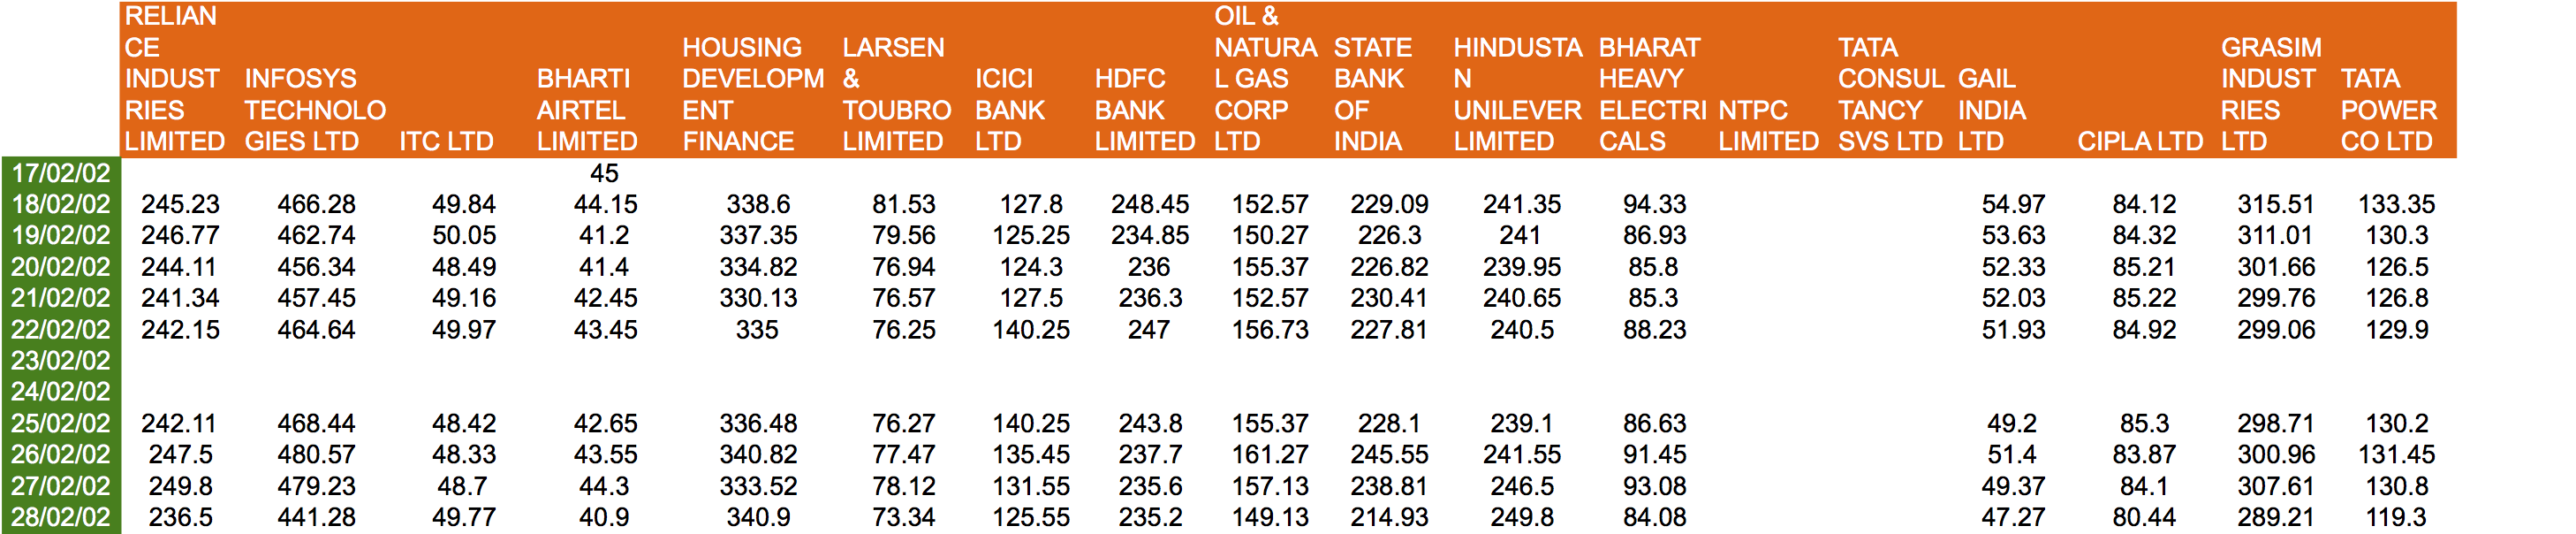

In [5]:
from IPython.display import Image
Image("/kaggle/input/some-glimpses-of-financial-data-wrangling/Lesson2Fig2_1.png")


####     Fig. 2.2  Snapshot of a finance dataset that calls for filling missing data values 

The function **FillMissingValues** undertakes to fill the missing stock prices with the previous day's prices for a dataset satisfying the mandatory requirements.

In [6]:
#function to fill missing values of daily stock prices
#Mandatory requirements: (1) The dataset should have been cleaned of all empty rows 
#before missing values are filled, and 
#(2) the opening row of the dataset should not have any empty fields

def FillMissingValues(StockPrices):
    
    import numpy as np
    print('Fill missing values...')
    
    #identify positions of the missing values in StockPrices
    [rows, cols] = np.where(np.asarray(np.isnan(StockPrices)))
    
    #replace missing value with the previous day's price
    for t in range(rows.size):
        i=rows[t]
        j = cols[t]
        if (i-1) >= 0:           
            StockPrices.iloc[i,j]= StockPrices.iloc[i-1, j].copy()
        else:
            print('error')
    return StockPrices

The Python code to undertake missing values filling for the dataset shown in Fig. 2.2 is shown below.

In [7]:
#filling missing values of stock prices dataset

#dependencies
import numpy as np
import pandas as pd

#input dataset and the dimensions of the cleaned dataset
StockFileName = '/kaggle/input/some-glimpses-of-financial-data-wrangling/Lesson2MissingValBSE200.csv'
Rows = 11  #excluding header
Columns = 5  #excluding date

#read stock prices from the dataset as a pandas dataframe
df = pd.read_csv(StockFileName,  nrows= Rows)
StockData = df.iloc[0:, 1:]

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print('Asset Labels:',assetLabels)

#impute missing data with previous day's trading price
stockDataClean = FillMissingValues(StockData)
print('Filling missing values completed!\n')
print(stockDataClean)


Asset Labels: ['JINDAL SAW LTD', 'BAJAJ HINDUSTHAN LIMITED', 'LAKSHMI MACHINE WORKS LTD', 'GUJARAT MINERAL DEV CORP LTD', 'MOSER BAER INDIA LTD']
Fill missing values...
Filling missing values completed!

    JINDAL SAW LTD  BAJAJ HINDUSTHAN LIMITED  LAKSHMI MACHINE WORKS LTD  \
0            60.85                      5.10                      69.00   
1            60.70                      5.10                      70.00   
2            59.50                      5.10                      70.00   
3            58.80                      5.06                      69.50   
4            57.25                      4.92                      66.49   
5            57.05                      5.25                      69.90   
6            62.35                      5.25                      70.00   
7            66.55                      4.86                      70.00   
8            68.50                      4.86                      70.50   
9            69.65                      4.86  

The two functions **EmptyRowsElimination** and **FillMissingValues** have been independently demonstrated over two live datasets only for purposes of illustration. In practice, needless to say, every stock price dataset will have to undergo the two cleaning operations in a sequence, to render them fit for models that will work on critical investment decision making using these historical datasets. 

## Suggested further reading

There are innumerable books and blogs that have been written on Data Wrangling or more familiarly Data Pre-processing. It is therefore left to the reader's choice to select those that cater to their individual needs.   

**scikit-learn** is a Python Library built on **NumPy**, **SciPy** and **matplotlib**,  and comprises a  repertoire of tools to work on **machine learning**. The package **sklearn.preprocessing** in scikit-learn, provides numerous utility functions and transformers to help undertake data preprocessing. 

## References
GitHub Repository
PythonFinance-PortfolioOptimization https://github.com/PaiViji

##  ***Next .....***


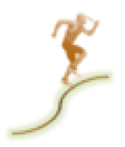

In [8]:
from IPython.display import Image
Image("/kaggle/input/some-glimpses-of-financial-data-wrangling/Lesson2ExitTailImage.png")

**Lesson3: Heuristic Portfolio Selection**    

(Goal: Given the vast and variegated universe of securities, how can one make a prudent and efficient choice of securities for one's portfolio?)  

Kaggle Kernel: Heuristic Portfolio Selection
 